Natalia Brzozowska
# Laboratorium 10
## Dyskretna Transformacja Fouriera

***
### Zadanie 1
   1. Zaimplementuj funkcję realizujacą DFT jako iloczyn macierzy Fouriera $F_{n}$ i n-elementowego wektora wejściowego ($y = F_{n}x$).
   
   2. Zaimplementuj również IDFT korzystając z tożsamości (tożsaomość). Sprawdź poprawność działania funkcji realizujacej DFT stosując transformacje odwrotną($x = F^{−1}_{n}y$) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.
   
   3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz $F_{n}$ dla danych o różnym rozmiarze.

***
### 1. DFT.

Poniżej zaimplementowałam funkcję _make_Fourier_matrix(n)_ , która tworzy macierz Fouriera, funkcję _w(n)_ , która zwraca odpowiednią wartość (prymitywny pierwiastek jedności) i funkcję _DFT(x)_ , która, korzystając m.in z wcześniej opisanych funkcji, zwraca dyskretną transformatę Fouriera.<br><br>
Do funkcji _DFT(x)_ przekazywany jest wektor wejściowy x. W funkcji obliczany jest rozmiar tego wektora. Rozmiar wektora pownien być równy potędze dwójki. Jeśli tak jest to wywoływana jest funkcja _make_Fourier_matrix(n)_ i później zwracana odpowiednia wartość.<br><br>
Do funkcji _make_Fourier_matrix(n)_ jest przekazywany rozmiar wektora wejściowego. Na poczatku obliczana jest wartość $om$ równa $om=e^{(-2\pi i) /n}$, gdzie $i^{2} = -1$, korzystając z funkcji _w(n)_. Tworzona jest macierz o romiarze $nxn$, gdzie $n$ to rozmiar wektora wejściowego. Wartości elementów w macierzy Fouriera są równe $om^{jk}$, gdzie $j$ i $k$ to numery wiersza i kolumny macierzy.


In [3]:
import numpy as np
import cmath
import math

In [4]:
def w(n):
    return (np.e)**(-(2*np.pi*1j)/n)

def make_Fourier_matrix(n):
    om = w(n)
    F=np.zeros((n,n), dtype=complex)
    for i in range(n):
        for k in range(n):
            F[i][k]=om**(i*k)
    return F

def DFT(x):
    n = len(x)
    s = int(np.log2(n))
    if(2**s == n):
        F = make_Fourier_matrix(n)
        return F, F@x
    else:
        print("wrong array size")
    return 0,0

In [5]:
x=np.array([1,2-1j,-1j,-1+2j])

F, dft = DFT(x)

***
### 2. IDFT.

Poniżej zaimplementowałam funkcje potrzebne do obliczenie odwrotnej transformaty Fouriera. Funkcja IDF(F,y) przjmuje macierz Fouriera obliczoną w poprzednio opisywanej funkjci oraz wektory wyjściowy y. Ta funkcja służy wyznaczeniu wektora wejściowego x. Do obliczenia wektora skorzystałam z zależności podanej w zadaniu dotyczacej macierzy sprzężonych $F_{n}^{-1}y = \frac{\overline{F_{n}\overline{y}}}{n}$. Macierz sprzężoną wyznaczam przy pomocy funkcji numpy.conjugate.

In [6]:
def IDF(y,F):
    n = len(y)
    return np.conjugate(F@np.conjugate(y))/n

In [7]:
idf = IDF(dft,F)

Poniżej znajdują się porównania wyników działania zaimplementowanych funkcji z funkcją biblioteczną.

In [8]:
print("Porównanie implemetacji DFT z funkcją biblioteczną -",np.allclose(dft,np.fft.fft(x)))
print("Porównanie implemetacji IDFT z funkcją biblioteczną -", np.allclose(idf,np.fft.ifft(dft)))
print("Porównanie wektora x uzyskanego z funkcji IDFT (wej) z wektorem wejściowym (x)-", np.allclose(idf, x))

Porównanie implemetacji DFT z funkcją biblioteczną - True
Porównanie implemetacji IDFT z funkcją biblioteczną - True
Porównanie wektora x uzyskanego z funkcji IDFT (wej) z wektorem wejściowym (x)- True


### 3. Algorytm Cooleya-Turkeya.

In [482]:
def w2(n,k):
    return (np.e)**(-(2*np.pi*1j*k)/n)

def Cooley_Turkey_FFT(x):
    n = len(x)
    
    if n<=1:
        return x
    else:

        a0=np.array(x[0::2])
        a1=np.array(x[1::2])

        x1 = np.array(Cooley_Turkey_FFT(a0))
        x2 = np.array(Cooley_Turkey_FFT(a1)    )
        print(x1)
        for k in range(0, int(n/2)-1):
            t = x1[k]
            p = w2(n,k) * x2[k+int(n/2)]
            x1[k] = t + p
            x2[k+int(n/2)] = t - p 

        print(x1)

        result=np.zeros((n,), dtype=complex)
        p=0

        for i in range(n):
            print(x1)
            print(i,p,n)
            if(i%2==0):
                print(result, x1)
                result[i] = x1[p]
            else:
                result[i] = x2[p]
                p+=1

        return result

In [483]:
N=128
x_values = np.arange(0, N, 1)

x = np.sin((2*np.pi*x_values / 32.0)) # 32 - 256Hz
x += np.sin((2*np.pi*x_values / 64.0)) # 64 - 128Hz
x = np.array(x)
x1 = np.fft.fft(x)
Cooley_Turkey_FFT(x)
print(x)
print(x1)
np.allclose(x1,x)

[0.]
[0.]
[0.]
0 0 2
[0.+0.j 0.+0.j] [0.]
[0.]
1 0 2
[-1.2246468e-16]
[-1.2246468e-16]
[-1.2246468e-16]
0 0 2
[0.+0.j 0.+0.j] [-1.2246468e-16]
[-1.2246468e-16]
1 0 2
[ 0.00000000e+00+0.j -7.34788079e-16+0.j]


IndexError: index 2 is out of bounds for axis 0 with size 2

In [484]:
0%2

0

***
### Wnioski

***
### Zadanie 2.
I. Wygeneruj dwa sygnały czasowo-amplitudowe:
  1. Sygnał będacy suma pięciu sygnałów sinusoidalnych o różnych częstotliwościach
  2. Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie 1, ale ułożonych przedziałami, tzn. w każdym z pieciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości
  
II. Dokonaj transformacji sygnałów 1 i 2 do domeny częstotliwościowej, porównaj
otrzymane wyniki. Przedstaw na osobnych wykresach cześć rzeczywistą i cześć
urojoną wyniku transformacji.

***
### I.1
Wygenerowałam sygnał, na który składa się pięć sygnałów sinusoidalnych o różnych częstotliwościach, które zostały do siebie dodane. Poniżej znajduje się wykres przedstawiający wygenerowany sygnał.

In [11]:
import matplotlib.pylab as plt

In [78]:
N = 512
x = np.arange(0, N, 1)

y = np.sin(x/2)     
y += np.sin(x/5) 
y += np.sin(x/7) 
y += np.sin(x/11) 
y += np.sin(x/17) 

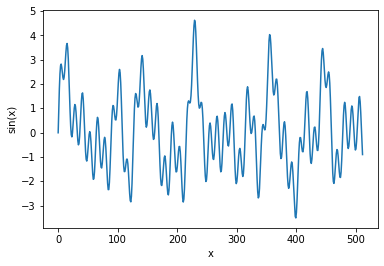

In [79]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

### I.2
Wygenerowałam sygnał składający się z sygnałów o odpowiednich częstotliwościach (tych, które zostały użyte także w poprzednim sygnale), które zostały do siebie dołączone. Poniżej znajduje się wykres przedstawiający utworzony sygnał.

In [84]:
N = 102

x1 = np.arange(0, N, 1)
y1 = np.sin(x1/2)

x2 = np.arange(N, N*2, 1)
y2 = np.sin(x2/5) 

x3 = np.arange(N*2, N*3, 1)
y3 = np.sin(x3/7) 

x4 = np.arange(N*3, N*4, 1)
y4 = np.sin(x4/11) 

x5 = np.arange(N*4, N*5+2, 1)
y5 = np.sin(x5/17) 

xi = np.arange(0, N*5+2, 1)
yi = np.concatenate((y1,y2,y3,y4,y5), axis=None)

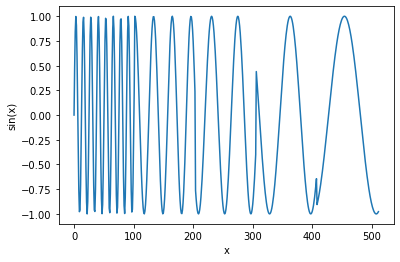

In [85]:
plt.plot(xi,yi)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

### II
Przy pomocy wcześniej zaimplementowanych funkcji dokonałam transformacji utworzonych sygnałów do doment częstotliwościowej. Wykorzystałam algorytm Cooleya-Turkeya.<br>
Następnie rozdzieliłam otrzymane wyniki na część rzeczywistą i urojoną, by później przedstawić je na wykresie.

In [146]:
f1,dftx1 = DFT(y)
dftx_r1 = [num.real for num in dftx1]
dftx_i1 = [num.imag for num in dftx1]

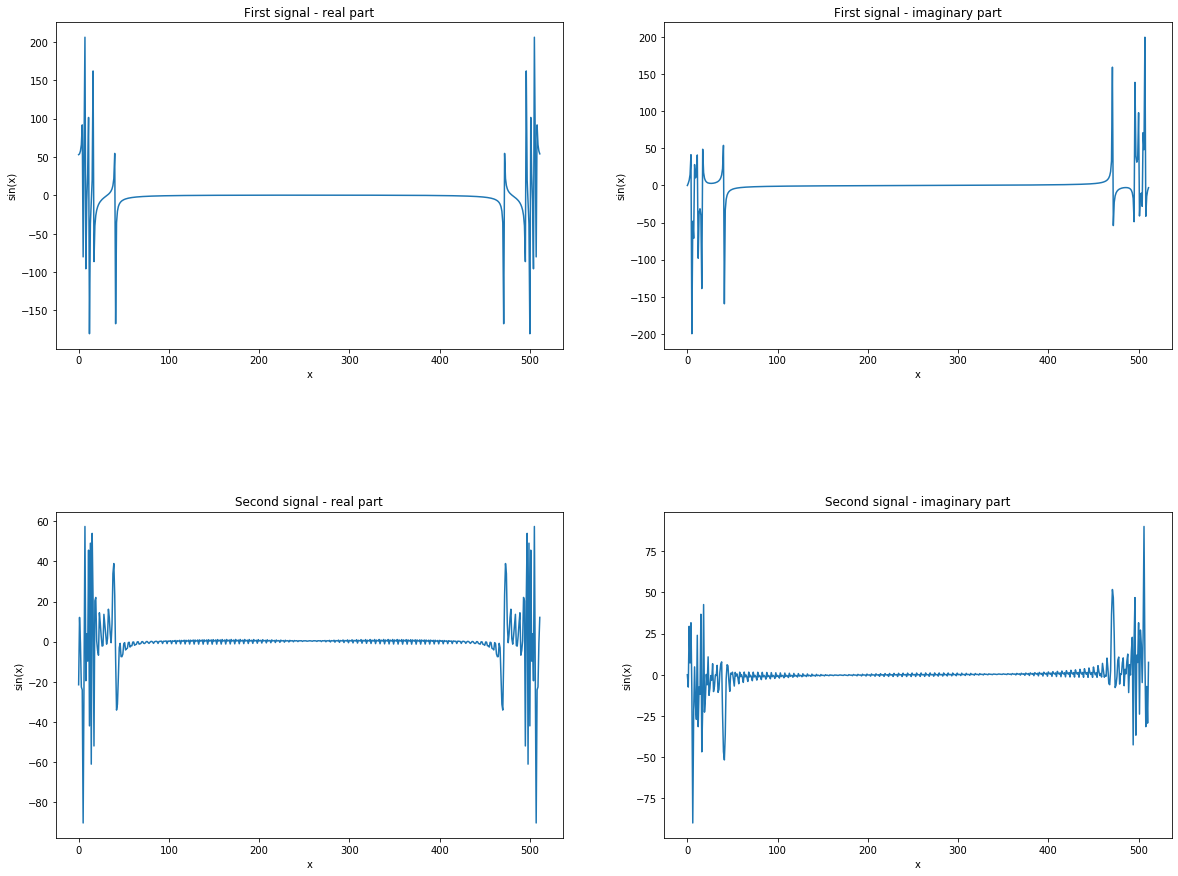

In [147]:
f,dftx2 = DFT(yi)
dftx_r2 = [num.real for num in dftx2]
dftx_i2 = [num.imag for num in dftx2]


fig, axs = plt.subplots(2,2, figsize=(20,15))
fig.subplots_adjust(hspace=0.5)

axs[0,0].plot(x,dftx_r1)
axs[0,0].set_title("First signal - real part")
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('sin(x)')

axs[0,1].plot(x,dftx_i1)
axs[0,1].set_title("First signal - imaginary part")
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('sin(x)')

axs[1,0].plot(xi,dftx_r2)
axs[1,0].set_title("Second signal - real part")
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('sin(x)')

axs[1,1].plot(xi,dftx_i2)
axs[1,1].set_title("Second signal - imaginary part")
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('sin(x)')

plt.show()

### Porównanie wyników

***
### Wnioski